# graph time

In [2]:
#!/usr/bin/env python3
"""
The Neural Network Deepens
"""


import numpy as np


class DeepNeuralNetwork:
    """
    The Deep Neural Network
    """
    def __init__(self, nx, layers):
        """
        Initializes the Deep Neural Network
        """
        if not isinstance(nx, int):
            raise TypeError('nx must be an integer')
        if nx < 1:
            raise ValueError('nx must be a positive integer')
        if not isinstance(layers, list) or len(layers) == 0:
            raise TypeError('layers must be a list of positive integers')
        
        weights = {}
        previous = nx
        
        for index, layer in enumerate(layers, 1):
            if not isinstance(layer, int) or layer < 1:
                raise TypeError('layers must be a list of positive integers')
            
            weights["b{}".format(index)] = np.zeros((layer, 1))      
            weights["W{}".format(index)] = (np.random.randn(layer, previous) *
                                            np.sqrt(2 / previous))
            previous = layer
            
        self.__L = len(layers)
        self.__cache = {}
        self.__weights = weights
        
    @property
    def L(self):
        return self.__L
    
    @property
    def cache(self):
        return self.__cache
    
    @property
    def weights(self):
        return self.__weights

    def forward_prop(self, X):
        """
        Calculates the forward propagation of the neural network
        :param X: array with shape (nx, m) with input data
        nx is the number of input features
        m is the number of examples
        """
        self.__cache["A0"] = X
        
        for index in range(self.L):
            W = self.weights["W{}".format(index + 1)]
            b = self.weights["b{}".format(index + 1)]
            
            z = np.matmul(W, self.cache["A{}".format(index)]) + b
            a = 1 / (1 + np.exp(-z))
            
            self.__cache["A{}".format(index + 1)] = a
        return a, self.cache
    
    def cost(self, Y, A):
        """
        Calculates the cost of the model using logistic regression
        :param Y: array with shape (1, m) with correct labels for input data
        :param A: array with shape (1, m) with activated  outputs
        for each example
        To avoid division by zero errors, we will use
        1.0000001 - A instead of 1 - A
        """
        m = Y.shape[1]
        m_loss = np.sum(( Y * np.log(A) + (1 - Y) * np.log((1.0000001 - A)) ))
        costs = (1 / m) *  (-m_loss)
        return costs
    
    def evaluate(self, X, Y):
        """
        Evaluates the deep neural network
        """
        A, cache = self.forward_prop(X)
        cost = self.cost(Y, A)
        predictions = np.where(A >= 0.5, 1, 0)
        return predictions, cost
    
    def gradient_descent(self, Y, cache, alpha=0.05):
        """
        Calculates the Gradient Descent of one pass
        
        :param Y: array with shape (1, m) with correct labels for input data
        :param cache: dictionary with intermediary values of the network
        :param alpha: learning rate
        
        updates the private attributes __weights
        """
        m = Y.shape[1]
        back = {}

        for index in range(self.L, 0, -1):

            A = cache["A{}".format(index - 1)]
            if index == self.L:
                back["dz{}".format(index)] = (cache["A{}".format(index)] - Y)
            else:
                dz_prev = back["dz{}".format(index + 1)]
                A_current = cache["A{}".format(index)]
                back["dz{}".format(index)] = (
                    np.matmul(W_prev.transpose(), dz_prev) *
                    (A_current * (1 - A_current)))

            dz = back["dz{}".format(index)]
            dW = (1 / m) * (np.matmul(dz, A.transpose()))
            db = (1 / m) * np.sum(dz, axis=1, keepdims=True)
            W_prev = self.weights["W{}".format(index)]

            self.__weights["W{}".format(index)] = (
                self.weights["W{}".format(index)] - (alpha * dW))
            self.__weights["b{}".format(index)] = (
                self.weights["b{}".format(index)] - (alpha * db))

    def train(self, X, Y, iterations=5000, alpha=0.05, verbose=True,
              graph=True, step=100):
        """
        Trains the neuron and updates weights and cache
        
        :param X: array with input data, shape (nx, m)
        nx is the number of input samples
        m is the number of examples
        
        :param Y: array with shape (1, m) with the correct labels
        
        iterations: number of iterations
        if iterations is not an integer, raise a TypeError with the exception iterations must be an integer
        if iterations is not positive, raise a ValueError with the exception iterations must be a positive integer
        
        :param alpha: learning rate
        if alpha is not a float, raise a TypeError with the exception alpha must be a float
        if alpha is not positive, raise a ValueError with the exception alpha must be positive
        
        :param verbose: whether to or not print the training progress
        
        :param graph: whether to print the graph
        
        :param step: step size for gradient descent
        """
        if type(iterations) is not int:
            raise TypeError("iterations must be an integer")
        if iterations <= 0:
            raise ValueError("iterations must be a positive integer")
        if type(alpha) is not float:
            raise TypeError("alpha must be a float")
        if alpha <= 0:
            raise ValueError("alpha must be positive")
        if verbose or graph:
            if type(step) is not int:
                raise TypeError("step must be an integer")
            if step <= 0 or step > iterations:
                raise ValueError("step must be positive and <= iterations")
        if graph:
            import matplotlib.pyplot as plt
            x_points = np.arange(0, iterations + 1, step)
            points = []
        for itr in range(iterations):
            A, cache = self.forward_prop(X)
            if verbose and (itr % step) == 0:
                cost = self.cost(Y, A)
                print("Cost after " + str(itr) + " iterations: " + str(cost))
            if graph and (itr % step) == 0:
                cost = self.cost(Y, A)
                points.append(cost)
            self.gradient_descent(Y, cache, alpha)
        itr += 1
        if verbose:
            cost = self.cost(Y, A)
            print("Cost after " + str(itr) + " iterations: " + str(cost))
        if graph:
            cost = self.cost(Y, A)
            points.append(cost)
            y_points = np.asarray(points)
            plt.plot(x_points, y_points, 'b')
            plt.xlabel("iteration")
            plt.ylabel("cost")
            plt.title("Training Cost")
            plt.show()
        return self.evaluate(X, Y)
    

Cost after 0 iterations: 0.6958649419170609
Cost after 100 iterations: 0.6444304786060048
Cost after 200 iterations: 0.5517433505455311
Cost after 300 iterations: 0.41682286414562636
Cost after 400 iterations: 0.2930845842379517
Cost after 500 iterations: 0.2085928766737876
Cost after 600 iterations: 0.1555317399182092
Cost after 700 iterations: 0.12157786810056745
Cost after 800 iterations: 0.09881291593882859
Cost after 900 iterations: 0.08280699900497755
Cost after 1000 iterations: 0.07107710239363428
Cost after 1100 iterations: 0.0621776992174538
Cost after 1200 iterations: 0.055228864339019204
Cost after 1300 iterations: 0.04967167227063108
Cost after 1400 iterations: 0.04513727320185708
Cost after 1500 iterations: 0.04137394729005453
Cost after 1600 iterations: 0.03820480096046837
Cost after 1700 iterations: 0.03550229939529273
Cost after 1800 iterations: 0.03317240498371485
Cost after 1900 iterations: 0.031144392104916922
Cost after 2000 iterations: 0.02936412545386763
Cost afte

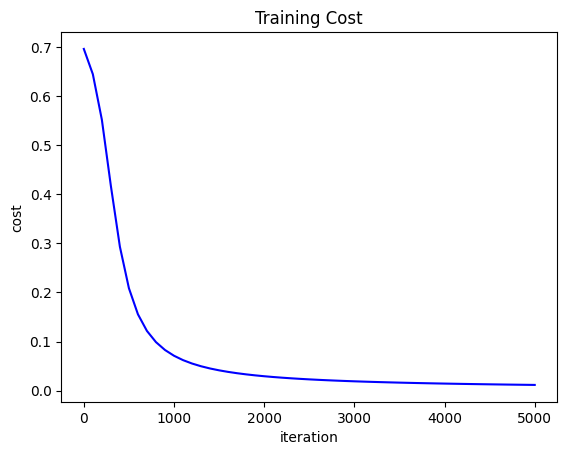

Train cost: 0.011671820326008163
Train accuracy: 99.88945913936044%
Dev cost: 0.009249552132279246
Dev accuracy: 99.95271867612293%


NameError: name 'plt' is not defined

In [3]:
Deep = DeepNeuralNetwork

lib_train = np.load('../data/Binary_Train.npz')
X_train_3D, Y_train = lib_train['X'], lib_train['Y']
X_train = X_train_3D.reshape((X_train_3D.shape[0], -1)).T
lib_dev = np.load('../data/Binary_Dev.npz')
X_dev_3D, Y_dev = lib_dev['X'], lib_dev['Y']
X_dev = X_dev_3D.reshape((X_dev_3D.shape[0], -1)).T

np.random.seed(0)
deep = Deep(X_train.shape[0], [5, 3, 1])
A, cost = deep.train(X_train, Y_train)
accuracy = np.sum(A == Y_train) / Y_train.shape[1] * 100
print("Train cost:", cost)
print("Train accuracy: {}%".format(accuracy))
A, cost = deep.evaluate(X_dev, Y_dev)
accuracy = np.sum(A == Y_dev) / Y_dev.shape[1] * 100
print("Dev cost:", cost)
print("Dev accuracy: {}%".format(accuracy))
fig = plt.figure(figsize=(10, 10))
for i in range(100):
    fig.add_subplot(10, 10, i + 1)
    plt.imshow(X_dev_3D[i])
    plt.title(A[0, i])
    plt.axis('off')
plt.tight_layout()
plt.show()